# Описание проекта: телекоммуникации
  
Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Ваша задача — обучить на этих данных модель для прогноза оттока клиентов.
  
### Описание услуг
  
Оператор предоставляет два основных типа услуг: 
- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).
  
Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).
  
Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.
  
### Описание данных
  
Данные состоят из нескольких файлов, полученных из разных источников:
  
`contract_new.csv` — информация о договоре;  
`personal_new.csv` — персональные данные клиента;  
`internet_new.csv` — информация об интернет-услугах;  
`phone_new.csv` — информация об услугах телефонии.  
  
#### Файл `contract_new.csv`
  
`customerID` — идентификатор абонента;  
`BeginDate` — дата начала действия договора;  
`EndDate` — дата окончания действия договора;  
`Type` — тип оплаты: раз в год-два или ежемесячно;  
`PaperlessBilling` — электронный расчётный лист;  
`PaymentMethod` — тип платежа;  
`MonthlyCharges` — расходы за месяц;  
`TotalCharges` — общие расходы абонента.  
  
#### Файл `personal_new.csv`
  
`customerID` — идентификатор пользователя;  
`gender` — пол;  
`SeniorCitizen` — является ли абонент пенсионером;  
`Partner` — есть ли у абонента супруг или супруга;  
`Dependents` — есть ли у абонента дети.  
  
#### Файл `internet_new.csv`
  
`customerID` — идентификатор пользователя;  
`InternetService` — тип подключения;  
`OnlineSecurity` — блокировка опасных сайтов;  
`OnlineBackup` — облачное хранилище файлов для резервного копирования данных;  
`DeviceProtection` — антивирус;  
`TechSupport` — выделенная линия технической поддержки;  
`StreamingTV` — стриминговое телевидение;  
`StreamingMovies` — каталог фильмов.  
  
#### Файл `phone_new.csv`
  
`customerID` — идентификатор пользователя;  
`MultipleLines` — подключение телефона к нескольким линиям одновременно.
  
Во всех файлах столбец `customerID` содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.
Данные также находятся в тренажёре, в папке `/datasets/`.

## Содержание:
* [Загрузка библиотек и данных](#Загрузка-библиотек-и-данных)
* [Предобработка и анализ](#Предобработка-и-анализ)
    * [`contract_new`](#contract_new)
    * [`personal_new`](#personal_new)
    * [`internet_new`](#internet_new)
    * [`phone_new`](#phone_new)
    * [Объединение датафреймов и общий препроцессинг](#Объединение-датафреймов-и-общий-препроцессинг)
* [Исследовательский анализ данных](#Исследовательский-анализ-данных)
    * [Категориальные переменные](#Категориальные-переменные)
    * [Количественные переменные](#Количественные-переменные)
    * [Анализ мультиколлинеарности](#Анализ-мультиколлинеарности)
* [Деление на выборки](#Деление-на-выборки)
* [Обучение моделей](#Обучение-моделей)
    * [Логистическая регрессия](#Логистическая-регрессия)
    * [Random Forest](#Random-Forest)
    * [CatBoostClassifier](#CatBoostClassifier)
* [Анализ лучшей модели](#Анализ-лучшей-модели)
* [Итоговые выводы](#Итоговые-выводы)

## Загрузка библиотек и данных

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
#загрузка библиотек

import pandas as pd
import numpy as np
import re
import phik
import time

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

In [3]:
#константы

RANDOM_STATE = 80424
COLORS = ['#FFB6C1', '#ADD8E6', '#6495ED', '#9999FF']
FIGSIZE = [15, 20]

In [4]:
#загрузка всех данных

try:
    contract_new = pd.read_csv('/datasets/contract_new.csv')
    personal_new = pd.read_csv('/datasets/personal_new.csv')
    internet_new = pd.read_csv('/datasets/internet_new.csv')
    phone_new = pd.read_csv('/datasets/phone_new.csv')
except:
    contract_new = pd.read_csv('/Users/yumo/Downloads/contract_new.csv')
    personal_new = pd.read_csv('/Users/yumo/Downloads/personal_new.csv')
    internet_new = pd.read_csv('/Users/yumo/Downloads/internet_new.csv')
    phone_new = pd.read_csv('/Users/yumo/Downloads/phone_new.csv')

## Предобработка и анализ

### `contract_new`

In [5]:
#приводим названия признаков к змеиному регистру
contract_new.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in contract_new.columns] 
contract_new = contract_new.rename(columns={'customer_i_d':'customer_id'})

contract_new.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

In [6]:
print(contract_new.head())
print('----------------------------------------------------------------------')
print(contract_new.info())
print('----------------------------------------------------------------------')
print(contract_new.describe())

  customer_id  begin_date end_date            type paperless_billing  \
0  7590-VHVEG  2020-01-01       No  Month-to-month               Yes   
1  5575-GNVDE  2017-04-01       No        One year                No   
2  3668-QPYBK  2019-10-01       No  Month-to-month               Yes   
3  7795-CFOCW  2016-05-01       No        One year                No   
4  9237-HQITU  2019-09-01       No  Month-to-month               Yes   

              payment_method  monthly_charges total_charges  
0           Electronic check            29.85         31.04  
1               Mailed check            56.95       2071.84  
2               Mailed check            53.85        226.17  
3  Bank transfer (automatic)            42.30        1960.6  
4           Electronic check            70.70         353.5  
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column       

In [7]:
#проверим какие есть уникальные значения в категориальных переменных
contract_new['type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: type, dtype: int64

In [8]:
contract_new['payment_method'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_method, dtype: int64

In [9]:
contract_new['paperless_billing'].value_counts()

Yes    4171
No     2872
Name: paperless_billing, dtype: int64

In [10]:
contract_new.duplicated().sum()

0

1. В первом датафрейме нет ни пропусков, ни дубликатов
2. В признаке `end_date` есть значение `No`, что означает, что договор на момент создания датафрейма всё ещё действителен. Поменяем это значение на последнюю дату, упомянутую в датафрейме (01.02.2020)
3. Даты начала и окончания действия договора (признаки `begin_date` и `end_date`) нужно перевести в формат даты
4. Признаки `type`, `paperless_billing` и `payment_method` категориальные. К ним нужно применить OneHotEncoder перед применением в линейных моделях, или OrdinalEncoder для дерева решений
5. Признак `total_charges` нужно перевести в числа с плавающей точкой
6. Добавим признак `use_days`, где в днях посмотрим на продолжительность действия договора
7. Для того, чтобы создать целевой признак, создадим столбец `contract_now`, где если в конечной дате есть No, то `contract_now` = 0. Если конечная дата стоит, то `contract_now` = 1. Сделаем это до 2 пункта.

In [11]:
#заполняем пропуски на 0, подразумевая, что пропуск означает отсутствие расходов
contract_new.loc[contract_new['total_charges'] == ' ', 'total_charges'] = 0

#меняем тип данных у total_charges
contract_new['total_charges'] = contract_new['total_charges'].astype(float)

In [12]:
#создание переменной contract_now
contract_new['contract_now'] = (contract_new['end_date'] != 'No').astype(int)

In [13]:
#заменяем значение No датой выгрузки данных
contract_new['end_date'] = contract_new['end_date'].replace(['No'], ['2020-02-01'])
print(contract_new[contract_new['end_date'] == 'No'].shape[0])

0


In [14]:
#меняем тип данных у begin_date и end_date
contract_new['begin_date'] = pd.to_datetime(contract_new['begin_date'], format='%Y-%m-%d')
contract_new['end_date'] = pd.to_datetime(contract_new['end_date'], format='%Y-%m-%d')
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   contract_now       7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 495.3+ KB


In [15]:
contract_new['use_days'] = (contract_new['end_date'] - contract_new['begin_date']).dt.days
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   contract_now       7043 non-null   int64         
 9   use_days           7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 550.4+ KB


In [16]:
contract_new.head(10)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,contract_now,use_days
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153
5,9305-CDSKC,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,99.65,1150.96,0,337
6,1452-KIOVK,2018-04-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,0,671
7,6713-OKOMC,2019-04-01,2020-02-01,Month-to-month,No,Mailed check,29.75,300.48,0,306
8,7892-POOKP,2017-07-01,2020-02-01,Month-to-month,Yes,Electronic check,104.80,3573.68,0,945
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,1,882


### `personal_new`

In [17]:
#приводим названия признаков к змеиному регистру
personal_new.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in personal_new.columns] 
personal_new = personal_new.rename(columns={'customer_i_d':'customer_id'})

personal_new.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

In [18]:
print(personal_new.head())
print('----------------------------------------------------------------------')
print(personal_new.info())
print('----------------------------------------------------------------------')
print(personal_new.describe())

  customer_id  gender  senior_citizen partner dependents
0  7590-VHVEG  Female               0     Yes         No
1  5575-GNVDE    Male               0      No         No
2  3668-QPYBK    Male               0      No         No
3  7795-CFOCW    Male               0      No         No
4  9237-HQITU  Female               0      No         No
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None
----------------------------------------------------------------------
       senior_citizen
count     7043.000000
m

In [19]:
#проверим какие есть уникальные значения в категориальных переменных
personal_new['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [20]:
personal_new['senior_citizen'].value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [21]:
personal_new['partner'].value_counts()

No     3641
Yes    3402
Name: partner, dtype: int64

In [22]:
personal_new['dependents'].value_counts()

No     4933
Yes    2110
Name: dependents, dtype: int64

In [23]:
personal_new.duplicated().sum()

0

1. В датафрейме нет ни пропусков, ни дубликатов
2. Ко всем 4 категориальным бинарным признакам нужно применить OHE и OE (`gender`, `senior_citizen`, `partner`, `dependents`)
3. Нужно перевести значения 0 и 1 в признаке `senior_citizen` на `No` и `Yes`, а тип данных в `object`

In [24]:
personal_new.loc[personal_new['senior_citizen'] == 0, 'senior_citizen'] = 'No' 
personal_new.loc[personal_new['senior_citizen'] == 1, 'senior_citizen'] = 'Yes' 

In [25]:
personal_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   object
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB


### `internet_new`

In [26]:
#приводим названия признаков к змеиному регистру
internet_new.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in internet_new.columns] 
internet_new = internet_new.rename(columns={'customer_i_d':'customer_id'})

internet_new.columns

Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_t_v',
       'streaming_movies'],
      dtype='object')

In [27]:
print(internet_new.head())
print('----------------------------------------------------------------------')
print(internet_new.info())
print('----------------------------------------------------------------------')
print(internet_new.describe())

  customer_id internet_service online_security online_backup  \
0  7590-VHVEG              DSL              No           Yes   
1  5575-GNVDE              DSL             Yes            No   
2  3668-QPYBK              DSL             Yes           Yes   
3  7795-CFOCW              DSL             Yes            No   
4  9237-HQITU      Fiber optic              No            No   

  device_protection tech_support streaming_t_v streaming_movies  
0                No           No            No               No  
1               Yes           No            No               No  
2                No           No            No               No  
3               Yes          Yes            No               No  
4                No           No            No               No  
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dt

In [28]:
#проверим какие есть уникальные значения в категориальных переменных
for i in internet_new.columns:
    print(f'Признак "{i}" имеет {len(internet_new[i].unique())} уникальных значений:')
    print(internet_new[i].unique(), '\n')

Признак "customer_id" имеет 5517 уникальных значений:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

Признак "internet_service" имеет 2 уникальных значений:
['DSL' 'Fiber optic'] 

Признак "online_security" имеет 2 уникальных значений:
['No' 'Yes'] 

Признак "online_backup" имеет 2 уникальных значений:
['Yes' 'No'] 

Признак "device_protection" имеет 2 уникальных значений:
['No' 'Yes'] 

Признак "tech_support" имеет 2 уникальных значений:
['No' 'Yes'] 

Признак "streaming_t_v" имеет 2 уникальных значений:
['No' 'Yes'] 

Признак "streaming_movies" имеет 2 уникальных значений:
['No' 'Yes'] 



In [29]:
personal_new.duplicated().sum()

0

1. В датафрейме нет пропусков и дубликатов
2. Все переменные кроме айди пользователя являются категориальными бинарными, будем из кодировать с помощью OHE и OE

### `phone_new`

In [30]:
#приводим названия признаков к змеиному регистру
phone_new.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in phone_new.columns] 
phone_new = phone_new.rename(columns={'customer_i_d':'customer_id'})

phone_new.columns

Index(['customer_id', 'multiple_lines'], dtype='object')

In [31]:
print(phone_new.head())
print('----------------------------------------------------------------------')
print(phone_new.info())
print('----------------------------------------------------------------------')
print(phone_new.describe())

  customer_id multiple_lines
0  5575-GNVDE             No
1  3668-QPYBK             No
2  9237-HQITU             No
3  9305-CDSKC            Yes
4  1452-KIOVK            Yes
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None
----------------------------------------------------------------------
       customer_id multiple_lines
count         6361           6361
unique        6361              2
top     2809-ILCYT             No
freq             1           3390


In [32]:
#проверим какие есть уникальные значения в категориальных переменных
phone_new['multiple_lines'].value_counts()

No     3390
Yes    2971
Name: multiple_lines, dtype: int64

In [33]:
personal_new.duplicated().sum()

0

1. В датафрейме нет пропусков и дубликатов
2. Только один категориальный бинарный признак - `multiple_lines`. Кодирование через OHE и OE

### Объединение датафреймов и общий препроцессинг

Для дальнейшей работы нам нужно соединить все датафреймы. Во всех есть айди пользователя, по которому будем соединять таблицы.

In [34]:
print('Размерность датафрейма "contract_new":', contract_new.shape)
print('Размерность датафрейма "personal_new":', personal_new.shape)
print('Размерность датафрейма "internet_new":', internet_new.shape)
print('Размерность датафрейма "phone_new"   :', phone_new.shape)

Размерность датафрейма "contract_new": (7043, 10)
Размерность датафрейма "personal_new": (7043, 5)
Размерность датафрейма "internet_new": (5517, 8)
Размерность датафрейма "phone_new"   : (6361, 2)


В первых двух датафреймах хранится основная информация. Делаем предположение, что учитывая их одинаковую длину, айди совпадают. Соединяя оставшиееся два датафрейма заполним пропуски значением `No`, так как это предполагает, что услуга не подключена.

In [35]:
data = contract_new \
    .merge(personal_new, how='left', on='customer_id') \
    .merge(internet_new, how='left', on='customer_id') \
    .merge(phone_new, how='left', on='customer_id') 

data['customer_id'].is_unique

True

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   contract_now       7043 non-null   int64         
 9   use_days           7043 non-null   int64         
 10  gender             7043 non-null   object        
 11  senior_citizen     7043 non-null   object        
 12  partner            7043 non-null   object        
 13  dependents         7043 non-null   object        
 14  internet

Айди оказались уникальными. Устанавливаем их в качестве индекса и заполняем пустые значения на `No`.

In [37]:
data = data.set_index('customer_id')

In [38]:
no_columns = [
    'internet_service', 'online_security', 'online_backup', 
    'device_protection', 'tech_support', 'streaming_t_v', 
    'streaming_movies', 'multiple_lines'
]

for column in no_columns:
    data[column] = data[column].fillna('No')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7043 non-null   datetime64[ns]
 1   end_date           7043 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless_billing  7043 non-null   object        
 4   payment_method     7043 non-null   object        
 5   monthly_charges    7043 non-null   float64       
 6   total_charges      7043 non-null   float64       
 7   contract_now       7043 non-null   int64         
 8   use_days           7043 non-null   int64         
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   object        
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14

Так как мы создали переменную, отражающую количество дней, можем удалить данные о начале и конце заключения договора.

In [40]:
del data['begin_date']
del data['end_date']

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   total_charges      7043 non-null   float64
 5   contract_now       7043 non-null   int64  
 6   use_days           7043 non-null   int64  
 7   gender             7043 non-null   object 
 8   senior_citizen     7043 non-null   object 
 9   partner            7043 non-null   object 
 10  dependents         7043 non-null   object 
 11  internet_service   7043 non-null   object 
 12  online_security    7043 non-null   object 
 13  online_backup      7043 non-null   object 
 14  device_protection  7043 non-null   object 
 15  tech_support       7043 non-null   object 
 16  streaming_t_v 

В рамках предобработки мы проверили данные на наличие пропусков и дубликатов, меняли типы данных. Также соединили все данные в одну таблицу и заполнили пустые данные, получившиеся при соединении.

## Исследовательский анализ данных

Всего у нас 19 признаков:
 - 1 целевой: `contract_now`
 - 3 количественных: `monthly_charges`, `total_charges`, `use_days`
 - 15 категориальных: `type`, `paperless_billing`, `payment_method`, `gender`, `senior_citizen`, `partner`, `dependents`, `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_t_v`, `streaming_movies`, `multiple_lines`

### Категориальные данные

In [42]:
categorical_cols = ['type', 'paperless_billing', 'payment_method', 'gender',
                    'senior_citizen', 'partner', 'dependents', 'internet_service',
                    'online_security', 'online_backup', 'device_protection',
                    'tech_support', 'streaming_t_v', 'streaming_movies', 'multiple_lines']

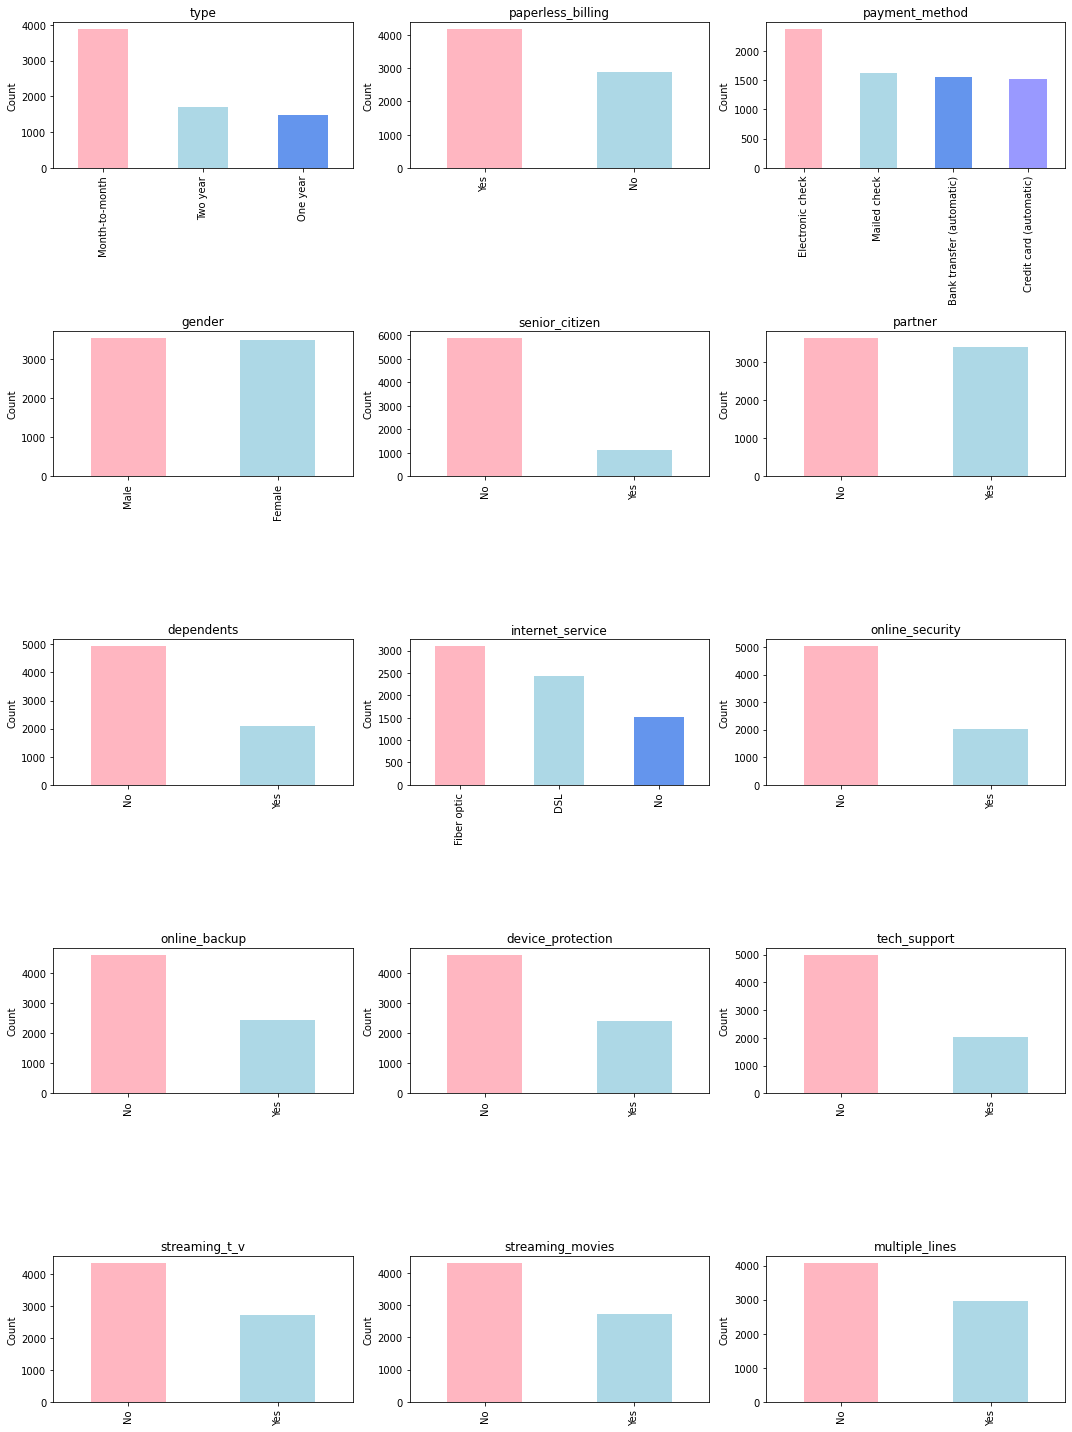

In [43]:
#диаграммы распределения категориальных признаков
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=FIGSIZE)

for i in range(len(categorical_cols)):
    ax = axes.flatten()[i]
    col = categorical_cols[i]
    
    data[col].value_counts().plot(kind='bar', ax=ax, color=COLORS)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

**Выводы:**
- Чаще всего пользователи выбирают ежемесячную оплату
- Самый популярный способ оплаты - электронный чек
- В равной степени услугами компании пользуются и мужчины, и женщины, а также люди в браке и вне брака
- Пенсионеры составляют маленькую долю клиентов
- У большинства пользователей нет детей
- Самый популярный тип подключения - оптическое волокно
- Дополнительные услуги (блокировка опасных сайтов, облачное хранилище, антивирус, техническая поддержка, стриминговое ТВ и каталог фильмов) не пользуются популярностью у пользователей.

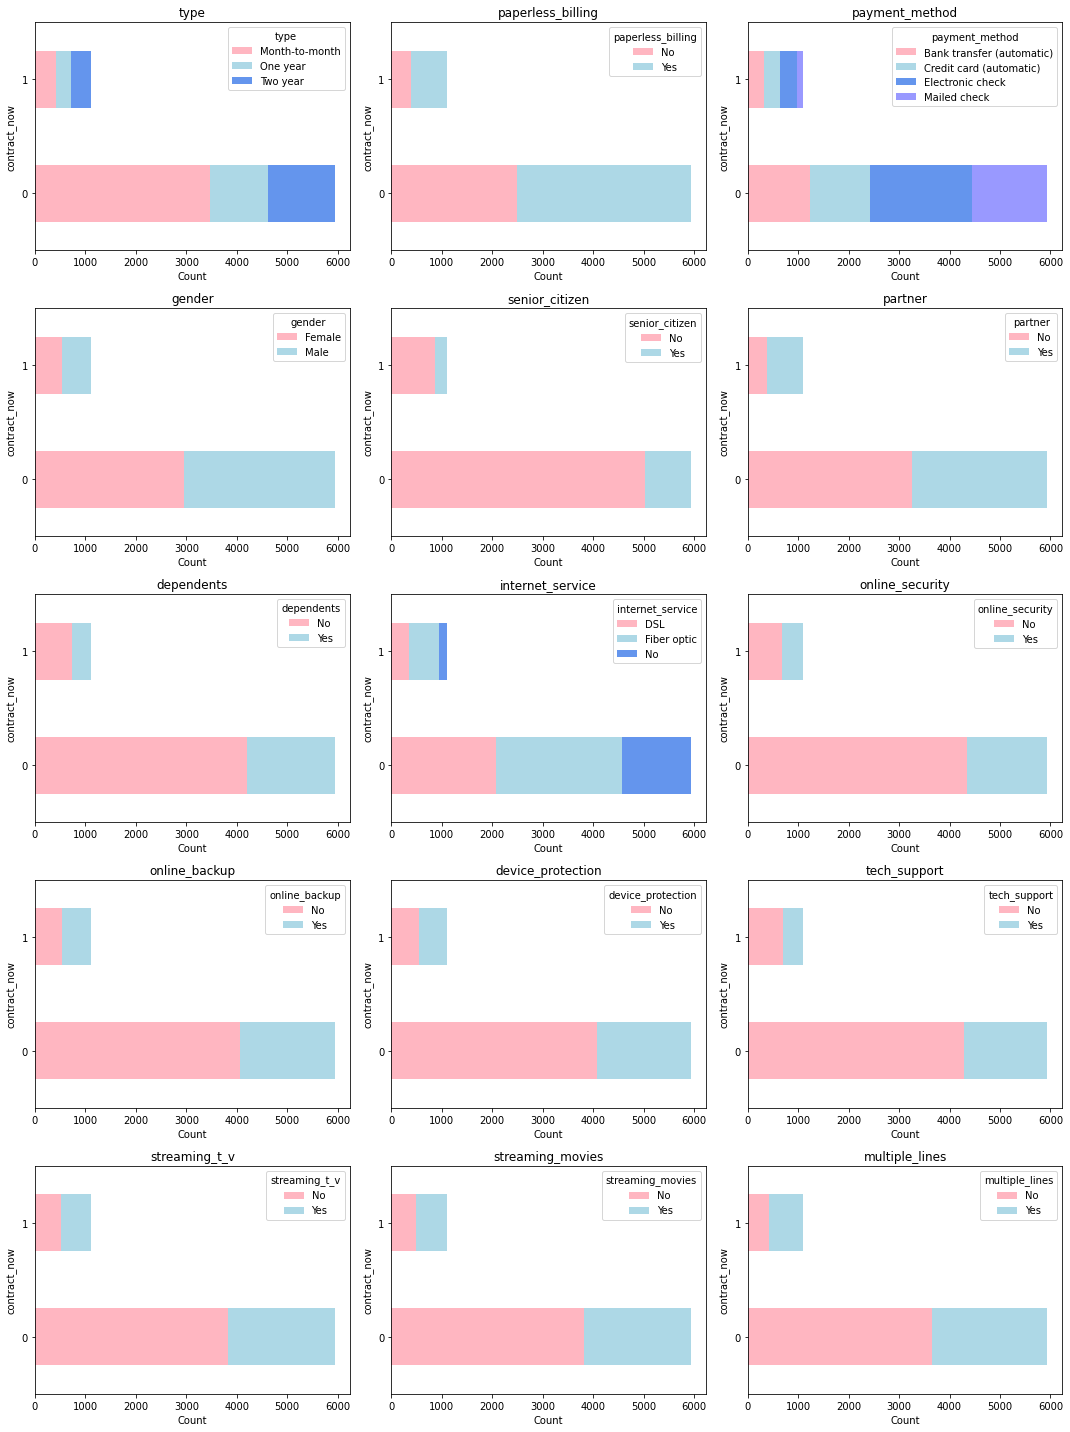

In [44]:
#диаграммы распределения категориальных признаков в зависимости от целевой переменной
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=FIGSIZE)

for i, col in enumerate(categorical_cols):
    ax = axes.flatten()[i]
    
    grouped = data.groupby(['contract_now', col]).size().unstack()
    grouped.plot(kind='barh', stacked=True, ax=ax, color=COLORS)
    
    ax.set_title(col)
    ax.set_ylabel('contract_now')
    ax.set_xlabel('Count')
    ax.legend(title=col)

plt.tight_layout()
plt.show()

**Выводы:**
- Дополнительные услуги практически не влияют на отток клиентов
- Большинство отказывающихся от услуг пользователей находились в браке
- Доля клиентов, которые отказались от использования услуг компании и платили ежемесечно, немного больше тех, кто платил на год-два вперед.

### Количественные данные

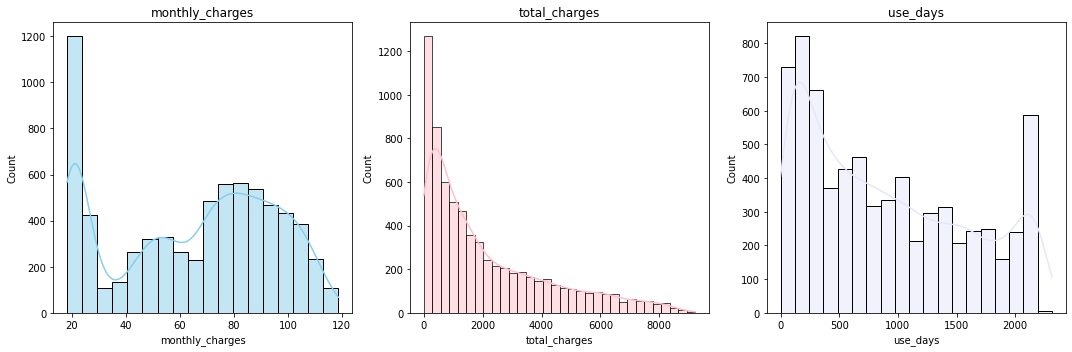

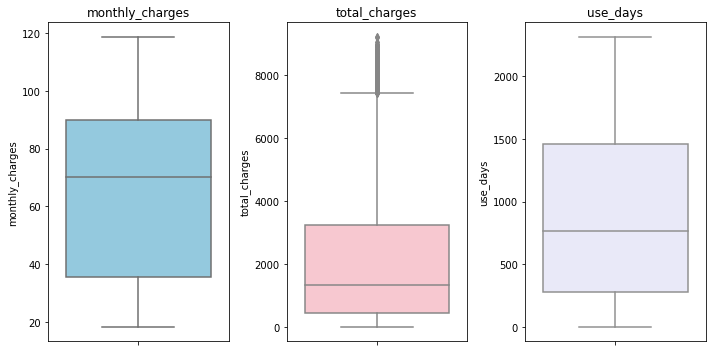

In [45]:
#графики распределения
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['monthly_charges'], kde=True, color='skyblue')
plt.title('monthly_charges')

plt.subplot(1, 3, 2)
sns.histplot(data['total_charges'], kde=True, color='pink')
plt.title('total_charges')

plt.subplot(1, 3, 3)
sns.histplot(data['use_days'], kde=True, color='lavender')
plt.title('use_days')

plt.tight_layout()
plt.show()

#ящики с усами
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=data['monthly_charges'], color='skyblue')
plt.title('monthly_charges')

plt.subplot(1, 3, 2)
sns.boxplot(y=data['total_charges'], color='pink')
plt.title('total_charges')

plt.subplot(1, 3, 3)
sns.boxplot(y=data['use_days'], color='lavender')
plt.title('use_days')

plt.tight_layout()
plt.show()

In [46]:
data[['monthly_charges', 'total_charges', 'use_days']].describe()

,monthly_charges,total_charges,use_days
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2115.312885,898.555729
std,30.090047,2112.742814,683.130510
min,18.250000,0.000000,0.000000
25%,35.500000,436.750000,276.000000
50%,70.350000,1343.350000,761.000000
75%,89.850000,3236.690000,1461.000000
max,118.750000,9221.380000,2314.000000


**Выводы:**
1. График `monthly_charges`
    - В среднем пользователи ежемесячно тратят около 70 единиц (медиана)
    - Ограничиваясь первым и третьим квартилями, мы можем сказать, что большинство пользователей тратят от 35 до 90 единиц
2. График `total_charges`
    - Считая общие траты, в среднем пользователи тратят около 1400 единиц
    - Большинство тратят от 400 до 3000 единиц
    - График имеет плавное уменьшение в большую сторону, что показывает, что небольшое количество пользователей имеют более высокие траты
3. График `use_days`
    - В среднем пользователи пользуются услугами компании около 750 дней
    - Большинство пользователей пользуются услугами от 270 до 1500 дней
    - Также есть небольшая часть пользователей с более долгим пользованием (максимум 2300)

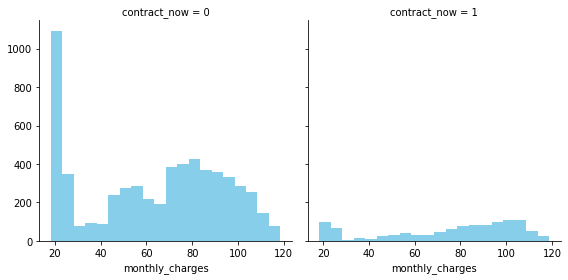

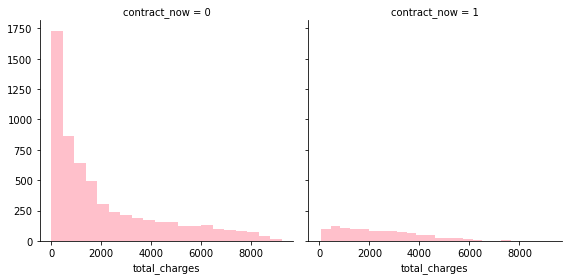

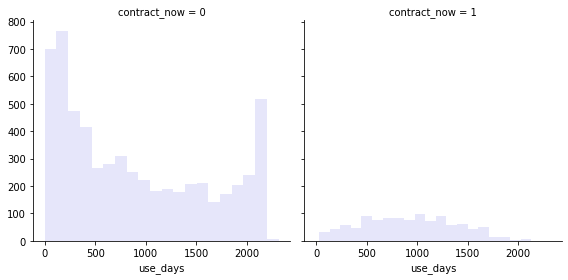

In [47]:
#monthly_charges с разделением по contract_now
g = sns.FacetGrid(data, col='contract_now', height=4)
g.map(plt.hist, 'monthly_charges', bins=20, color='skyblue')
plt.show()

#total_charges с разделением по contract_now
g = sns.FacetGrid(data, col='contract_now', height=4)
g.map(plt.hist, 'total_charges', bins=20, color='pink')
plt.show()

#use_days с разделением по contract_now
g = sns.FacetGrid(data, col='contract_now', height=4)
g.map(plt.hist, 'use_days', bins=20, color='lavender')
plt.show()

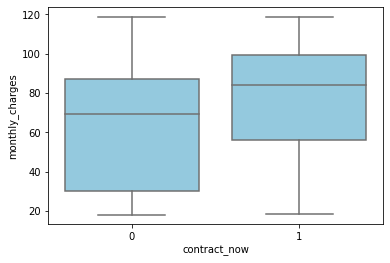

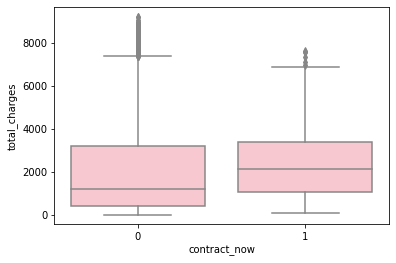

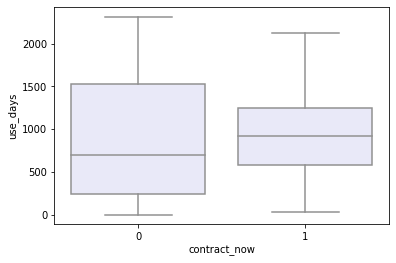

In [48]:
#ящик с усами для monthly_charges относительно contract_now 
sns.boxplot(x='contract_now', y='monthly_charges', data=data, color='skyblue')
plt.show()

#ящик с усами для total_charges относительно contract_now 
sns.boxplot(x='contract_now', y='total_charges', data=data, color='pink')
plt.show()

#ящик с усами для use_days относительно contract_now 
sns.boxplot(x='contract_now', y='use_days', data=data, color='lavender')
plt.show()

**Выводы:**
 - Когда контракт еще действует (`contract_now = 0`), распределение ежемесячных платежей более широкое и смещено к более высоким значениям. Это говорит о том, что более активные пользователи ежемесячно тратят больше(например, приобретая дополнительные услуги)
 - Когда контракт действует (`contract_now = 0`), распределение общих платежей имеет более длинный "хвост", указывая на присутствие пользователей с очень высокими совокупными расходами. Это может быть связано с тем, что пользователь долго пользуется услугами компании
 - Когда контракт действует (`contract_now = 0`), распределение дней использования более рассеянное, охватывая как пользователей с очень низким, так и с очень высоким использованием. Это может отражать разнообразие моделей потребления среди активных клиентов.

### Анализ мультиколлинеарности

In [49]:
data = data[['contract_now', 'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'type', 'use_days', 'gender', 'senior_citizen',
       'partner', 'dependents', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_t_v',
       'streaming_movies', 'multiple_lines']]

In [50]:
numeric_cols = ['monthly_charges', 'total_charges', 'use_days']

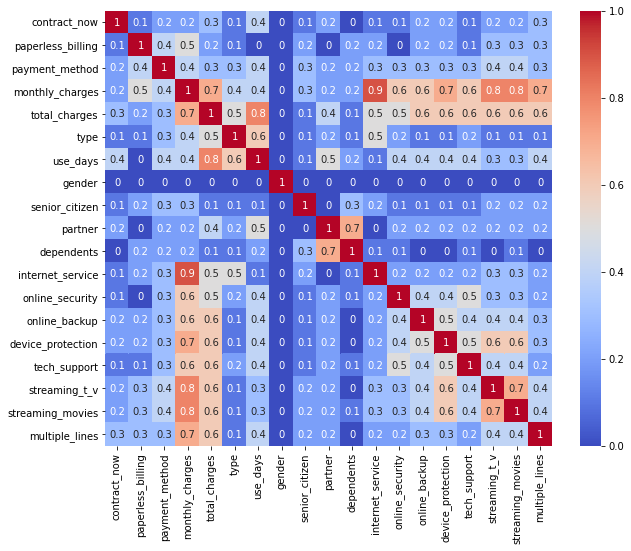

In [51]:
#корреляция
multicol = data.phik_matrix(interval_cols=numeric_cols)

#тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(multicol.copy().round(1), annot=True, cmap='coolwarm');
plt.show()

Возьмем все признаки, которые имеют корреляцию больше 0, так как они не имеют связи с целевым признаком.

In [52]:
final_data = data[['contract_now', 'paperless_billing', 'payment_method', 'monthly_charges',
                   'total_charges', 'type', 'use_days', 'senior_citizen',
                   'partner', 'internet_service', 'online_security',
                   'online_backup', 'device_protection', 'tech_support', 'streaming_t_v',
                   'streaming_movies', 'multiple_lines']]

## Деление на выборки

In [53]:
#признаки и целевой признак:
features_orig = final_data.drop('contract_now', axis=1)
target = final_data.contract_now

In [54]:
#деление на выборки:
features_train, features_test, target_train, target_test = train_test_split(features_orig,
                                                                            target, 
                                                                            test_size=.25,
                                                                            random_state=RANDOM_STATE)

In [55]:
#категориальные признаки 
ohe_features = features_train.select_dtypes(include='object').columns.to_list()
print(ohe_features)

['paperless_billing', 'payment_method', 'type', 'senior_citizen', 'partner', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_t_v', 'streaming_movies', 'multiple_lines']


In [56]:
#количественные признаки
num_features = features_train.select_dtypes(exclude='object').columns.to_list()
num_features

['monthly_charges', 'total_charges', 'use_days']

In [57]:
#кодирование OHE
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='error')

encoder_ohe.fit(features_train[ohe_features])

sparse_matrix = encoder_ohe.transform(features_train[ohe_features])

ohe_columns = encoder_ohe.get_feature_names().tolist()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(features_train[num_features])

features_train_arr = np.column_stack((sparse_matrix.toarray(), X_train_scaled))
features_train_ohe = pd.DataFrame(features_train_arr, columns = ohe_columns + num_features)

In [58]:
features_train_ohe.head()

,x0_Yes,x1_Credit card (automatic),x1_Electronic check,x1_Mailed check,x2_One year,x2_Two year,x3_Yes,x4_Yes,x5_Fiber optic,x5_No,x6_Yes,x7_Yes,x8_Yes,x9_Yes,x10_Yes,x11_Yes,x12_Yes,monthly_charges,total_charges,use_days
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.248421,-0.415769,-0.778485
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.488696,-0.820711,-0.462667
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.530268,-0.652963,0.293828
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.644189,2.860394,1.862636
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217430,-0.898408,-1.179501


In [59]:
sparse_matrix_test = encoder_ohe.transform(features_test[ohe_features])
X_test_scaled = scaler.transform(features_test[num_features])
features_test_arr = np.column_stack((sparse_matrix_test.toarray(), X_test_scaled))
features_test_ohe = pd.DataFrame(features_test_arr, columns = ohe_columns + num_features)

In [60]:
features_test_ohe.head()

,x0_Yes,x1_Credit card (automatic),x1_Electronic check,x1_Mailed check,x2_One year,x2_Two year,x3_Yes,x4_Yes,x5_Fiber optic,x5_No,x6_Yes,x7_Yes,x8_Yes,x9_Yes,x10_Yes,x11_Yes,x12_Yes,monthly_charges,total_charges,use_days
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.619246,0.188209,-0.330464
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.501999,-0.267300,1.903766
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.164217,-0.138272,-0.196792
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.523401,-0.836222,-1.133964
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187498,-0.754046,-0.998823


In [61]:
#кодировка OE:
encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1) 

features_train_oe = features_train[ohe_features]
features_train_oe = pd.DataFrame(encoder.fit_transform(features_train),
                                 columns=features_train.columns,
                                 index=features_train.index)

features_test_oe = features_test[ohe_features]
features_test_oe = pd.DataFrame(encoder.transform(features_test),
                                columns=features_test.columns,
                                index=features_test.index)

target_train_oe = target_train.copy()

target_test_oe = target_test.copy()

In [62]:
for i in [features_train_ohe, features_test_ohe, target_train, target_test]:
    print(i.shape)   
    
print()

for i in [features_train_oe, features_test_oe, target_train_oe, target_test_oe]:
    print(i.shape)

print()
    
for i in [features_train, features_test, target_train, target_test]:
    print(i.shape)

(5282, 20)
(1761, 20)
(5282,)
(1761,)

(5282, 16)
(1761, 16)
(5282,)
(1761,)

(5282, 16)
(1761, 16)
(5282,)
(1761,)


## Обучение моделей

In [63]:
#функция для построения графика roc-кривой
def plot_roc_curve(target_test, predictions):
    print('ROC-AUC score', roc_auc_score(target_test, predictions))
    
    fpr, tpr, thresholds = roc_curve(target_test, predictions)

    plt.figure(figsize=(11, 5))
    
    plt.plot(fpr, tpr, color=COLORS[0])
    
    plt.plot([0, 1], [0, 1], linestyle='--', color=COLORS[1])
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    plt.grid(True)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title('ROC-кривая')
    
    plt.show()

### Логистическая регрессия

In [64]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

model = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=RANDOM_STATE)

search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
search.fit(features_train_ohe, target_train)

print('ROC-AUC:', search.best_score_)
print('Лучшие параметры:', search.best_params_)

predicted_probalities = search.best_estimator_.predict_proba(features_train_ohe)[:, 1]

0.7696829355055007
{'C': 1}


### Random Forest

In [65]:
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [2, 10],
    'n_estimators': [10, 50, 100], 
}

model = RandomForestClassifier(random_state=RANDOM_STATE)

search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
search.fit(features_train_oe, target_train_oe)

print('ROC-AUC:', search.best_score_)
print('Лучшие параметры:', search.best_params_)

predicted_probalities = search.best_estimator_.predict_proba(features_train_oe)[:, 1]

0.8277815682669989
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


### CatBoostClassifier

In [66]:
param_grid_cb = {
    'learning_rate': [0.1, 0.7],
    'iterations': [50, 200],
    'l2_leaf_reg': [3, 15]
}

model_cb = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)

search_cb = GridSearchCV(model_cb, param_grid_cb, cv=5, scoring='roc_auc')
search_cb.fit(features_train_oe, target_train_oe)

print('ROC-AUC:', search_cb.best_score_)
print('Лучшие параметры:', search_cb.best_params_)

predicted_probalities = search_cb.best_estimator_.predict_proba(features_train_oe)[:, 1]

0.88893325867244
{'iterations': 200, 'l2_leaf_reg': 15, 'learning_rate': 0.7}


Самый высокий показатель на обучающей выборке: `CatBoostClassifier` с гиперпараметрами `{'iterations': 200, 'l2_leaf_reg': 15, 'learning_rate': 0.7}` и ROC-AUC 0.87. Проверим работу модели на тестовых данных.

ROC-AUC score 0.8697570598006644


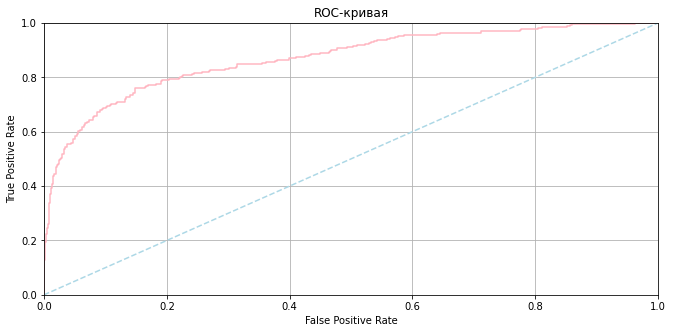

In [67]:
predicted_probalities = search_cb.best_estimator_.predict_proba(features_test_oe)[:, 1]
plot_roc_curve(target_test, predicted_probalities)

Таким образом на тестовой выборке `CatBoostClassifier` с параметрами `{'iterations': 200, 'l2_leaf_reg': 15, 'learning_rate': 0.7}` показала ROC-AUC 0.869.

## Анализ лучшей модели

In [68]:
predict = search_cb.predict(features_test_oe)
print('Accuracy:', accuracy_score(target_test, predict)) 

Accuracy: 0.9017603634298694


Показатель говорит нам о том, что модель делает правильный выбор в 87,9 процентах случаев.

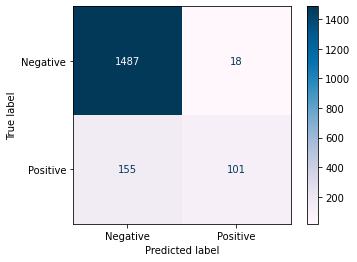

In [69]:
cm = confusion_matrix(target_test_oe, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
cmap = 'PuBu'
disp.plot(cmap=cmap)
plt.show()
plt.show()

По матрице мы можем оценить как хорошо модель определяет целевую переменную. Модель хорошо предсказывает случаи, когда договор не рассторгнут (верхняя горизонталь, True Negative и True Positive). При этом намного хуже предсказания того, что договор закроют (False Posiive и False Negative). В большинстве случаев модель лучше определить когда договор не рассторгнут.

In [70]:
importances_data = pd.DataFrame(search.best_estimator_.feature_importances_, index = features_test.columns, columns=['importances'])
importances_data = importances_data.sort_values(by='importances', ascending=False)
importances_data

,importances
use_days,0.241081
total_charges,0.187162
monthly_charges,0.171228
type,0.094562
payment_method,0.052081
multiple_lines,0.047909
partner,0.037065
online_backup,0.029549
device_protection,0.021638
streaming_movies,0.020027


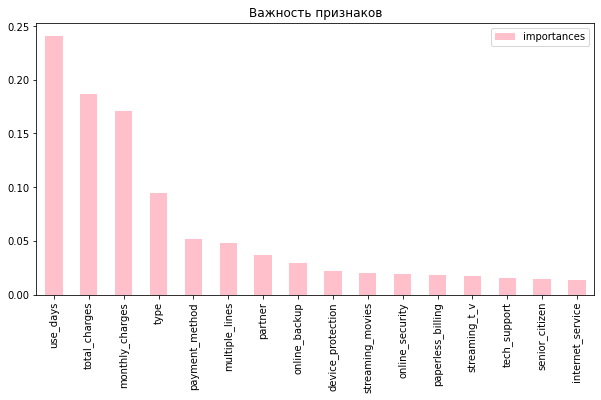

In [71]:
importances_data.plot(kind='bar', figsize=(10, 5), title='Важность признаков', color='pink')
plt.show()

Большей значимостью из всех обладает показатель длительности договора в днях. Немного меньше влияют ежемесячные и общие траты.

## Итоговые выводы

- В рамках проекта мы загрузили данные. Проверили их на наличие дубликатов и пропусков.  
- Проанализировали все четыре датасета и соединили их в один общий датасет. Добавили отдельную целевую переменную и обработали имеющиеся данные, поменяли тип данных.   
- Провели исследовательский анализ данных, где посмотрели распределение категориальных и количественных переменных как просто самих переменных, так и их связь с целевой переменной.   
- Категоризировали переменные и разделили их на выборки.   
- Обучили три модели: логистическая регрессия, случайный лес и catboost. На обучающей выборке логистическая регрессия показала 0.769, случайный лес - 0.827, а catboost - 0.888. В итоге лучшей моделью оказалась catboost с гиперпараметрами {'iterations': 200, 'l2_leaf_reg': 15, 'learning_rate': 0.7} и ключевым показателем на тестовой выборке ROC-AUC 0.869.  
- Модель в большем количестве случаев правильно определяет случаи, когда договор не будет рассторнуг.   
- Из всех переменных больше всего определяет целевую переменную количество дней, которые действует договор. Также влияют ежемесячные и общие траты. Остальные показатели в меньшей степени влияют на продолжение действия договора (дополнительные услуги, статус пенсионера, наличие партнера и другие).  
  
Все пункты плана были выполнены. Из-за невнимательности потерялась ключевая метрика, но главное вовремя это заметить! В целом проект состоял из загрузки данных и библиотек, исследования датафреймов, их обьединение. Статистического анализа данных, кодирования и масштабирования признаков. С помощью проделанного исследования а также анализа мультиколлинеарности мы вывели список признаков, которые использовали в обучении:  
 - 1 целевой: `contract_now`
 - 3 количественных: `monthly_charges`, `total_charges`, `use_days`
 - 13 категориальных: `type`, `paperless_billing`, `payment_method`, `senior_citizen`, `partner`, `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_t_v`, `streaming_movies`, `multiple_lines`
   
С помощью этих признаков обучили три модели и выбрали лучшую: catboost с гиперпараметрами {'iterations': 200, 'l2_leaf_reg': 15, 'learning_rate': 0.7} и ключевым показателем на тестовой выборке ROC-AUC 0.869. Самым важным фактором оказался показатель длительности договора в днях.